In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


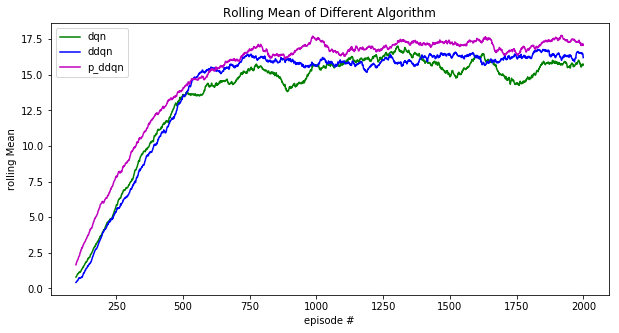

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

dqn_scores = np.load('./data/dqn_scores.npy')
ddqn_scores = np.load('./data/ddqn_scores.npy')
p_ddqn_scores = np.load('./data/p_ddqn_scores.npy')

dqn_rolling_mean = pd.Series(dqn_scores).rolling(100).mean()
ddqn_rolling_mean = pd.Series(ddqn_scores).rolling(100).mean()
p_ddqn_rolling_mean = pd.Series(p_ddqn_scores).rolling(100).mean()

# plot all rolling mean
fig = plt.figure(figsize=(10,5))
plt.title('Rolling Mean of Different Algorithm')
plt.plot(np.arange(len(dqn_rolling_mean)), dqn_rolling_mean, '-g', label='dqn')
plt.plot(np.arange(len(dqn_rolling_mean)), ddqn_rolling_mean, '-b', label='ddqn')
plt.plot(np.arange(len(dqn_rolling_mean)), p_ddqn_rolling_mean, '-m', label='p_ddqn')
plt.ylabel('rolling Mean')
plt.xlabel('episode #')
plt.legend()
plt.show()

In [3]:
import torch
from prioritizedagent import PrioritizedAgent
from unityagents import UnityEnvironment

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

agent_p_ddqn = PrioritizedAgent(state_size=37, action_size=4, seed=25, is_double_q=True)

# load the saved model
state_dict = torch.load('./checkpoint/agent_p_ddqn_checkpoint.pth', map_location=lambda storage, loc:storage)
agent_p_ddqn.qnetwork_local.load_state_dict(state_dict)



# test the agent
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent_p_ddqn.act(state, mode='test')  # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score: 11.0


From the above graph following are observations

    - The Double DQN with prioritized replay memory had performed slightly better than both Deep Q Network and Double DQN.
    - The prioritized model reached a score nearly to 13 within 400 episode
    - The DDQN model reached the score nearly to 13 within 500 episode
    - The DQN model reached the score nearly to 13 within 500 episode
    - Comparing to the un-trained model with a max score of 0. Our prioritized model performed much better with a score of  11.
    - The simple Network model of 2 layers of 64 units leads to a max limit of 13-17. Some modifications in the model can make it more complex and it may easily reach a greater score.
    - For the future, we can definitely try a more complex model. Also, we can try Dueling DQN and check for its score for comparison with our other models.
    - We can also try re-utilizing the prioritized model with different hyperparameters to achieve a greater score.